# Default_Credit_Card_Clients

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Ignoring harless warnings

import warnings
warnings.filterwarnings("ignore")

import pandasql as psql

In [2]:
# Load the Defult Credit Card cilents data

dccdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\42 seasion 15-jul-2021\Default_Credit_Card_Clients_SVM.csv",header = 0)
dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Display dataset information
dccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
dccdata.rename({'default payment next month' : 'CC_Default'}, axis = 1, inplace=True)
dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Count the target or dependent variable by '0' or '1' and
# their proportion (> 10: 1, then the dataset is imbalance dataset

dccdata_count = dccdata.CC_Default.value_counts()
print('Class 0: ', dccdata_count[0])
print('Class 1: ', dccdata_count[1])
print('Proportion: ', round(dccdata_count[0]/dccdata_count[1], 2), ': 1')
print('Total CC Trans: ', len(dccdata))      

Class 0:  23364
Class 1:  6636
Proportion:  3.52 : 1
Total CC Trans:  30000


In [6]:
# Finding is there any dupliactes present in the dataset
dccdata_dup = dccdata[dccdata.duplicated(keep='last')]
dccdata_dup

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default


# Dealing with missing data

In [7]:
# Display the unique by count per each variable
dccdata.nunique()

ID            30000
LIMIT_BAL        81
SEX               2
EDUCATION         7
MARRIAGE          4
AGE              56
PAY_1            11
PAY_2            11
PAY_3            11
PAY_4            11
PAY_5            10
PAY_6            10
BILL_AMT1     22723
BILL_AMT2     22346
BILL_AMT3     22026
BILL_AMT4     21548
BILL_AMT5     21010
BILL_AMT6     20604
PAY_AMT1       7943
PAY_AMT2       7899
PAY_AMT3       7518
PAY_AMT4       6937
PAY_AMT5       6897
PAY_AMT6       6939
CC_Default        2
dtype: int64

In [8]:
dccdata['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
# Missing value data size

dccdata_missing = (dccdata[(dccdata.EDUCATION == 0) | (dccdata.MARRIAGE == 0)])
dccdata_missing.shape

(68, 25)

In [10]:
dccdata_no_missing = dccdata[(dccdata.EDUCATION != 0) &  (dccdata.MARRIAGE != 0)]
dccdata_no_missing.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
dccdata_no_missing.shape

(29932, 25)

In [12]:
dccdata1 = dccdata_no_missing.copy()
dccdata1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
dccdata1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'CC_Default'],
      dtype='object')

In [14]:
# Converting into dummies

dccdata1 = pd.get_dummies(dccdata1, columns=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2',
                                            'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
dccdata1.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [15]:
cols = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [16]:
# Identify independent and target variable

x = dccdata1.drop(['CC_Default','ID'], axis=1)
y = dccdata1['CC_Default']

In [17]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)
x_test_f1 = x_test.copy()

In [18]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# SVM - Linear Kernal

In [19]:
# Building a preliminary SVM (Fit the Model to the data)

from sklearn.svm import SVC

dccdataSVM = SVC(C=1.0,break_ties=False,cache_size=200,class_weight=None,coef0=0.0,
                 decision_function_shape='ovr',degree=3,gamma='scale',kernel='linear',
                 max_iter=-1, probability=False,random_state=42,shrinking=True,tol=0.001, 
                 verbose=False)
dccdataSVM.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# Predictions with test data

y_pred = dccdataSVM.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[ 636 1332]
 [ 295 6717]]
Outcome Values : 
 636 1332 295 6717
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.32      0.44      1968
           0       0.83      0.96      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.76      0.64      0.67      8980
weighted avg       0.80      0.82      0.79      8980

Accuracy : 81.9 %
Precision : 68.3 %
Recall : 32.3 %
F1 Score : 0.439
Balanced Accuracy : 64.0 %
MCC 0.381
roc_auc_score: 0.641


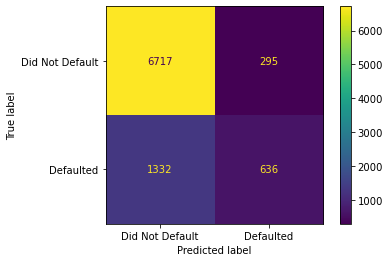

In [21]:
# Confusion Matraix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVM, x_test, y_test, values_format='d',
                     display_labels=['Did Not Default', 'Defaulted'])

# SVM-Polynomial Kernel

In [22]:
# Training the SVM alforithm

from sklearn.svm import SVC

dccdataSVMPoly = SVC(kernel='poly', degree=3, class_weight=None)
dccdataSVMPoly.fit(x_train, y_train)

# Predicting the values

y1_pred = dccdataSVMPoly.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[ 699 1269]
 [ 352 6660]]
Outcome Values : 
 699 1269 352 6660
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.36      0.46      1968
           0       0.84      0.95      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.75      0.65      0.68      8980
weighted avg       0.80      0.82      0.80      8980

Accuracy : 81.9 %
Precision : 66.5 %
Recall : 35.5 %
F1 Score : 0.463
Balanced Accuracy : 65.2 %
MCC 0.392
roc_auc_score: 0.652


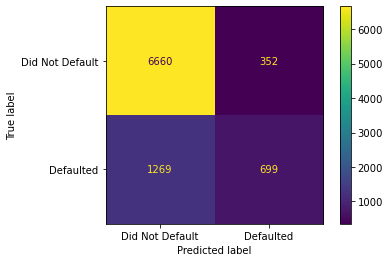

In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVMPoly, x_test, y_test, values_format='d',
                     display_labels=['Did Not Default', 'Defaulted'])

# SVM - Gaussian Kernel

In [24]:
# Training the SVM alforithm

from sklearn.svm import SVC

dccdataSVMGaussian = SVC(kernel='rbf', class_weight=None, random_state=None)
dccdataSVMGaussian.fit(x_train, y_train)

# Predicting the values

y3_pred = dccdataSVMGaussian.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[ 699 1269]
 [ 345 6667]]
Outcome Values : 
 699 1269 345 6667
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.36      0.46      1968
           0       0.84      0.95      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.75      0.65      0.68      8980
weighted avg       0.80      0.82      0.80      8980

Accuracy : 82.0 %
Precision : 67.0 %
Recall : 35.5 %
F1 Score : 0.464
Balanced Accuracy : 65.3 %
MCC 0.395
roc_auc_score: 0.653


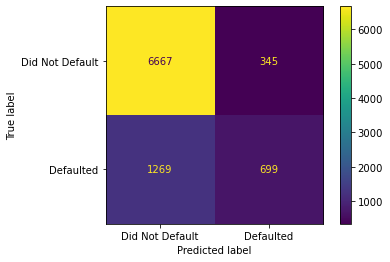

In [25]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVMGaussian, x_test, y_test, values_format='d',
                     display_labels=['Did Not Default', 'Defaulted'])

# SVM - Sigmoid Kernel

In [26]:
# Training the SVM alforithm

from sklearn.svm import SVC

dccdataSVMSig = SVC(kernel='rbf', class_weight=None, random_state=None)
dccdataSVMSig.fit(x_train, y_train)

# Predicting the values

y4_pred = dccdataSVMSig.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y4_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

Confusion matrix : 
 [[ 699 1269]
 [ 345 6667]]
Outcome Values : 
 699 1269 345 6667
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.36      0.46      1968
           0       0.84      0.95      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.75      0.65      0.68      8980
weighted avg       0.80      0.82      0.80      8980

Accuracy : 82.0 %
Precision : 67.0 %
Recall : 35.5 %
F1 Score : 0.464
Balanced Accuracy : 65.3 %
MCC 0.395
roc_auc_score: 0.653


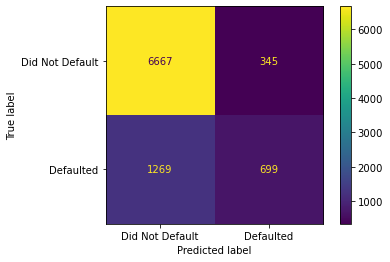

In [27]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVMSig, x_test, y_test, values_format='d',
                     display_labels=['Did Not Default', 'Defaulted'])

# Random forest Algorithm

In [28]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier

dccdataRF = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0, class_weight=None,
                                  criterion='entropy', max_depth=None, max_features='auto',
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                  warm_start=False,min_weight_fraction_leaf=0.0, n_estimators=500)

dccdataRF = dccdataRF.fit(x_train, y_train)

# Predict the model with test data set

y5_pred = dccdataRF.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y5_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

Confusion matrix : 
 [[ 626 1342]
 [ 291 6721]]
Outcome Values : 
 626 1342 291 6721
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.32      0.43      1968
           0       0.83      0.96      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.76      0.64      0.66      8980
weighted avg       0.80      0.82      0.79      8980

Accuracy : 81.8 %
Precision : 68.3 %
Recall : 31.8 %
F1 Score : 0.434
Balanced Accuracy : 63.8 %
MCC 0.378
roc_auc_score: 0.638


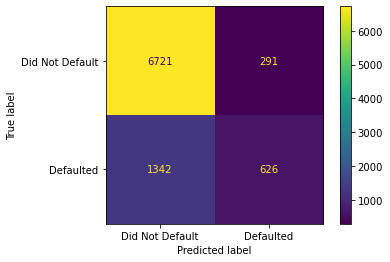

In [29]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataRF, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

# Decision Tree algorithm

In [30]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

dccdataDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                   max_depth=None, max_features=None, max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                   min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                   random_state=None, splitter='best')

dccdataDT = dccdataDT.fit(x_train,y_train)

# Predict with test data

y6_pred = dccdataDT.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y6_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))

Confusion matrix : 
 [[ 919 1049]
 [3006 4006]]
Outcome Values : 
 919 1049 3006 4006
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.47      0.31      1968
           0       0.79      0.57      0.66      7012

    accuracy                           0.55      8980
   macro avg       0.51      0.52      0.49      8980
weighted avg       0.67      0.55      0.59      8980

Accuracy : 54.8 %
Precision : 23.4 %
Recall : 46.7 %
F1 Score : 0.312
Balanced Accuracy : 51.9 %
MCC 0.032
roc_auc_score: 0.519


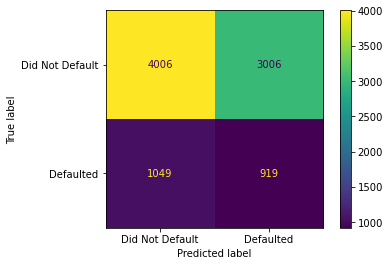

In [31]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataDT, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

# Logistic Regression Algorithm

In [32]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

dccdataLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                               intercept_scaling=1, max_iter=100, multi_class='auto', 
                               n_jobs=None, penalty='l2', random_state=None,
                               solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

dccdataLR = dccdataLR.fit(x_train,y_train)

# Predict the model with test data set

y7_pred = dccdataLR.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y7_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[ 713 1255]
 [ 360 6652]]
Outcome Values : 
 713 1255 360 6652
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.36      0.47      1968
           0       0.84      0.95      0.89      7012

    accuracy                           0.82      8980
   macro avg       0.75      0.66      0.68      8980
weighted avg       0.80      0.82      0.80      8980

Accuracy : 82.0 %
Precision : 66.4 %
Recall : 36.2 %
F1 Score : 0.469
Balanced Accuracy : 65.6 %
MCC 0.397
roc_auc_score: 0.641


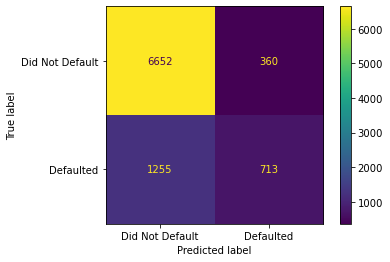

In [33]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataLR, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

# KNN - Algorithm

In [34]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

accuracy = []

for a in range(1, 10, 1):
    k = a
    dccdata1KNN = KNeighborsClassifier(n_neighbors=k)
    dccdata1KNN.fit(x_train, y_train)
    y8_pred = dccdata1KNN.predict(x_test)
    print('KNN_K_value = ', a)
    from sklearn.metrics import classification_report, confusion_matrix

    # actual values

    actual = y_test

    # predicted values
    predicted = y8_pred

    # confusion matrix

    matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

    print('Outcome Values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3) 

    specificity = round(tn/(tn+fp), 3)

    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp +fn)), 3);

    # Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

    MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

    print('Accuracy :', round(accuracy*100, 2), '%')
    print('Precision :', round(precision*100, 2), '%')
    print('Recall :', round(sensitivity*100, 2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
    print('MCC', MCC)

    from sklearn.metrics import roc_curve, roc_auc_score

    # Area under ROC curve 
    print('roc_auc_score:', round(roc_auc_score(y_test, y8_pred), 3))
    print('----------------------------------------------------------------------------------------------')

KNN_K_value =  1
Confusion matrix : 
 [[ 746 1222]
 [1273 5739]]
Outcome Values : 
 746 1222 1273 5739
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.38      0.37      1968
           0       0.82      0.82      0.82      7012

    accuracy                           0.72      8980
   macro avg       0.60      0.60      0.60      8980
weighted avg       0.72      0.72      0.72      8980

Accuracy : 72.2 %
Precision : 36.9 %
Recall : 37.9 %
F1 Score : 0.374
Balanced Accuracy : 59.8 %
MCC 0.196
roc_auc_score: 0.599
----------------------------------------------------------------------------------------------
KNN_K_value =  2
Confusion matrix : 
 [[ 415 1553]
 [ 358 6654]]
Outcome Values : 
 415 1553 358 6654
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.21      0.30      1968
           0       0.81      0.95      0.87      7012

    accuracy                 

# Naive Bayes

In [35]:
# Training the 'Naive Bayes' model to dataset

from sklearn.naive_bayes import GaussianNB

dccdataNB = GaussianNB()
dccdataNB.fit(x_train,y_train)

# Predict the model with test data set

y9_pred = dccdataNB.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y9_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y9_pred), 3))

Confusion matrix : 
 [[ 462 1506]
 [ 251 6761]]
Outcome Values : 
 462 1506 251 6761
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.23      0.34      1968
           0       0.82      0.96      0.89      7012

    accuracy                           0.80      8980
   macro avg       0.73      0.60      0.61      8980
weighted avg       0.78      0.80      0.77      8980

Accuracy : 80.4 %
Precision : 64.8 %
Recall : 23.5 %
F1 Score : 0.345
Balanced Accuracy : 59.9 %
MCC 0.304
roc_auc_score: 0.599


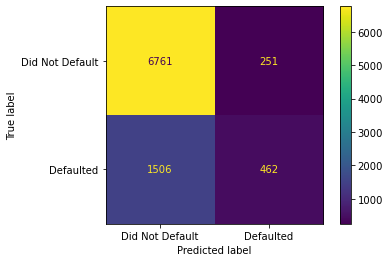

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataNB, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])